<a href="https://colab.research.google.com/github/hvyrain/bigprobasic/blob/main/%EB%AA%A8%EB%91%90%EC%9D%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D04_%EB%8C%80%EC%A4%91%EA%B5%90%ED%86%B5%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 11. 대중교통 데이터 시각화하기

### 01. 대중교통 데이터 내려받기, p158
- https://www.t-money.co.kr - 이용안내 - 대중교통 통계자료 - 엑셀 첨부파일 다운로드
- 탭 : 
 1. 버스정류장별 이용현황
 2. 지하철 노선별 역별 이용현황
 3. 지하철 유무임별 이용현황
 4. 지하철 시간대별 이용현황

- 지하철 유무임별 이용현황 분석

### 02. 지하철 유무임별 이용현황 데이터 정제하기, p161
엑셀로 열어 찾기 바꾸기 (Ctrl + F) 로 ','를 빈문자열('')로 변경, 작업일시 열 삭제
- 지하철 유무임별 이용현황 탭을 CSV(쉼표로 분리)로 저장, 파일명 subwayfee.csv

In [ ]:
# pandas 사용 예
import pandas as pd
dataf = pd.read_csv('subwayfee.csv')
print(dataf.head())
print(dataf.dtypes)
dataf['무임승차'].mean()

       사용월  호선명  역ID  지하철역    유임승차    유임하차    무임승차    무임하차
0  2021-07  1호선    1   서울역  820362  793039  149471  141043
1  2021-07  1호선   10   동묘앞  104572  110495  120348  120706
2  2021-07  1호선    2    시청  419634  420739   56095   54381
3  2021-07  1호선    3    종각  662251  646931  102831   96420
4  2021-07  1호선    4  종로3가  373284  345072  232400  219520
사용월     object
호선명     object
역ID      int64
지하철역    object
유임승차     int64
유임하차     int64
무임승차     int64
무임하차     int64
dtype: object


44514.306425041184

In [ ]:
dataf[(dataf['유임승차']/(dataf['유임승차'] + dataf['무임승차'])) < 0.5][['지하철역', '유임승차', '무임승차']]#.plot(kind='bar')

,지하철역,유임승차,무임승차
1,동묘앞,104572,120348
8,제기동,207970,208038
208,소요산,26732,71151
289,신원,2709,2837
294,원덕,4229,5143
295,용문,27278,40258
296,지평,835,1181
324,임진강,331,356
342,상천,3990,4340
344,굴봉산,2066,2813


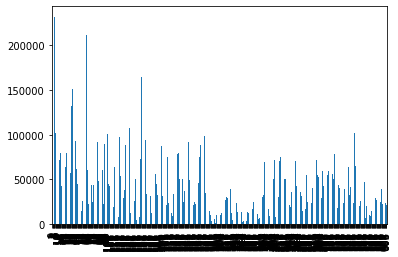

In [ ]:
dataf['무임승차'].plot(kind='bar')

In [ ]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
#datalist = list(data)
#print(datalist[:2])
next(data)
for row in data :
  for i in range(4,8) :
    row[i] = int(row[i])
  print(row)


### 03. 유임 승차 비율이 가장 높은 역은 어디일까?, p165
- 비율 = 유임 / (유임 + 무임)

In [ ]:
# p167
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0
for row in data :
  # 정수 변환
  for i in range(4, 8) :
    row[i] = int(row[i])
  if row[6] != 0 :
    rate = row[4] / row[6]
    if rate > mx : 
      mx = rate
      print(row, round(rate, 2))

['2021-07', '1호선', '1', '서울역', 820362, 793039, 149471, 141043] 5.49
['2021-07', '1호선', '2', '시청', 419634, 420739, 56095, 54381] 7.48
['2021-07', '2호선', '11', '시청', 458506, 446374, 40251, 36060] 11.39
['2021-07', '2호선', '19', '한양대', 144112, 147728, 9698, 9838] 14.86
['2021-07', '경부선', '121', '서울역', 129807, 43516, 7688, 1882] 16.88
['2021-07', '6호선', '445', '연신내', 27, 0, 1, 0] 27.0


In [ ]:
# p169
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0
for row in data :
  # 정수 변환
  for i in range(4, 8) :
    row[i] = int(row[i])
  if row[6] != 0 and (row[4] + row[6]) > 10000 :
    rate = row[4] / (row[4] + row[6])
    if rate > mx : 
      mx = rate
      print(row, round(rate, 4))

['2021-07', '1호선', '1', '서울역', 820362, 793039, 149471, 141043] 0.8459
['2021-07', '1호선', '2', '시청', 419634, 420739, 56095, 54381] 0.8821
['2021-07', '2호선', '11', '시청', 458506, 446374, 40251, 36060] 0.9193
['2021-07', '2호선', '19', '한양대', 144112, 147728, 9698, 9838] 0.9369
['2021-07', '경부선', '121', '서울역', 129807, 43516, 7688, 1882] 0.9441


In [ ]:
# p171
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0
mx_station = ''
for row in data :
  # 정수 변환
  for i in range(4, 8) :
    row[i] = int(row[i])
  if row[6] != 0 and (row[4] + row[6]) > 10000 :
    rate = row[4] / (row[4] + row[6])
    if rate > mx : 
      mx = rate
      mx_station = row[3] + ' ' + row[1]

print(f'{mx_station} {mx*100:5.2f}%')

서울역 경부선 94.41%


### 04. 유무임 승하차 인원이 가장 많은 역은 어디일까, p172
- 유무임 승하차 4가지 종류의 인원이 가장 많은 역 찾기
- 4개의 요소를 가진 리스트로 저장
- mx = [0] * 4
- mx_station = [''] * 4

In [ ]:
# p174
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
mx = [0] * 4
mx_station = [''] * 4
label = ['유임승차', '유임하차', '무임승차', '무임하차']
for row in data :
  # 정수 변환
  for i in range(4, 8) :
    row[i] = int(row[i])
    if row[i] > mx[i-4] :
      mx[i-4] = row[i]
      mx_station[i-4] = row[3] + ' ' + row[1]

for i in range(4) :
  print(f'{label[i]} : {mx_station[i]} {mx[i]:,}명')

유임승차 : 강남 2호선 1,848,689명
유임하차 : 강남 2호선 1,816,406명
무임승차 : 종로3가 1호선 232,400명
무임하차 : 제기동 1호선 223,315명


### 05. 모든 역의 유무임 승하차 비율은 어떻게 될까, p175
- 모든 역에 대하여 비율을 파이 차트로 그린다.
- plt.savefig(파일명.png) 함수를 사용하여 저장한다.

※ 역 갯수 : 606개

In [ ]:
# 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,953 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [ ]:
!ls /usr/share/fonts/truetype/nanum

NanumBarunGothicBold.ttf  NanumMyeongjoBold.ttf  NanumSquareRoundR.ttf
NanumBarunGothic.ttf	  NanumMyeongjo.ttf	 NanumSquareR.ttf
NanumGothicBold.ttf	  NanumSquareB.ttf
NanumGothic.ttf		  NanumSquareRoundB.ttf


In [ ]:
# p178, 10개만 저장해 본다.
import csv
import matplotlib.pyplot as plt

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
label = ['유임승차', '유임하차', '무임승차', '무임하차']
c = ['red','green','blue','yellow']
plt.rc('font', family='NanumGothic')

count = 1
max_no = 5
for row in data :
  for i in range(4, 8) :
    row[i] = int(row[i])
    plt.figure(dpi=300)
    plt.title(row[3] + ' ' + row[1])
    plt.pie(row[4:8], labels=label, colors=c, autopct='%1.f%%')
    plt.axis('equal')
    plt.savefig(row[3] + ' ' + row[1] + '.png')
    #plt.show()
  if count >= max_no :
      break
  count += 1

## 12. 지하철 시간대별 데이터 시각화하기
- 출근 시간대 사람들이 가장 많이 타고 내리는 역은?
- 지하철 시간대별로 가장 많은 사람이 승하차하는 역은?


### 01. 지하철 시간대별 이용 현황 데이터 정제하기, p180
- 지하철 시간대별 이용현황 탭 선택
- ','를 빈 문자열 ''로 치환, 작업일시 열 삭제
- 데이터를 subwaytime.csv로 내보내기
- 상위 두 행 건너뛰기
- map(int, row[i]) 함수로 정수 일괄 변경

In [ ]:
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
count = 0
for row in data :
  print(row)
  if count > 10 : break
  count += 1

['\ufeff사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', '', '05:00:00~05:59:59', '', '06:00:00~06:59:59', '', '07:00:00~07:59:59', '', '08:00:00~08:59:59', '', '09:00:00~09:59:59', '', '10:00:00~10:59:59', '', '11:00:00~11:59:59', '', '12:00:00~12:59:59', '', '13:00:00~13:59:59', '', '14:00:00~14:59:59', '', '15:00:00~15:59:59', '', '16:00:00~16:59:59', '', '17:00:00~17:59:59', '', '18:00:00~18:59:59', '', '19:00:00~19:59:59', '', '20:00:00~20:59:59', '', '21:00:00~21:59:59', '', '22:00:00~22:59:59', '', '23:00:00~23:59:59', '', '00:00:00~00:59:59', '', '01:00:00~01:59:59', '', '02:00:00~02:59:59', '', '03:00:00~03:59:59', '']
['', '', '', '', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차']
['2021-07', '1호선', '1', '서울역', '654', '6', '8652', '6342', 

In [ ]:
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

count = 0
for row in data :
  row[4:] = map(int, row[4:])
  if count < 10 :
    print(row)
  count += 1

['2021-07', '1호선', '1', '서울역', 654, 6, 8652, 6342, 11542, 33836, 34033, 80382, 52613, 163620, 38605, 102598, 35481, 51052, 41070, 42933, 48222, 46545, 49227, 45640, 44779, 41737, 55778, 44392, 65517, 45218, 107562, 55211, 163496, 64791, 73905, 40168, 47149, 25097, 50724, 22084, 32275, 16055, 8520, 5824, 29, 551, 0, 0, 0, 0, 0, 0]
['2021-07', '1호선', '10', '동묘앞', 92, 0, 3197, 1077, 3575, 4910, 5452, 8608, 8526, 21141, 7927, 15956, 9454, 17084, 13490, 20768, 17843, 21002, 21519, 22088, 22076, 20878, 23178, 18825, 23518, 15108, 21926, 12554, 19733, 9844, 9437, 6226, 5504, 4051, 4732, 3632, 2911, 4455, 827, 1955, 3, 1039, 0, 0, 0, 0, 0, 0]
['2021-07', '1호선', '2', '시청', 13, 0, 1803, 4616, 2797, 19665, 6210, 57888, 7368, 152937, 7995, 66434, 8964, 25943, 12915, 22965, 13811, 20773, 16626, 19677, 21240, 16066, 27115, 14014, 32142, 11942, 62498, 12167, 128494, 12588, 43231, 6198, 31976, 3934, 29470, 3605, 18039, 2636, 3016, 988, 6, 84, 0, 0, 0, 0, 0, 0]
['2021-07', '1호선', '3', '종각', 69, 0, 2246

### 02. 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까, p185
- 아침 7시 승차 데이터 위치 : 10번 인덱스
- 막대 그래프로 표현
- sort() 함수로 정렬한 후 막대 그래프 출력

In [ ]:
# p185
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
result = []

for row in data :
  row[4:] = map(int, row[4:])
  result.append(row[10])

print(len(result))
print(result)

607
[34033, 5452, 6210, 5346, 4445, 4807, 13558, 15927, 20256, 33371, 4359, 7643, 4872, 2967, 6033, 23780, 34140, 22713, 4487, 16613, 20378, 48460, 61180, 72218, 33832, 101659, 46493, 14604, 13714, 18658, 13359, 35242, 21346, 14120, 20269, 65492, 71387, 115574, 74203, 190957, 82096, 124041, 60413, 117522, 37023, 35547, 41992, 40143, 52333, 30417, 21435, 25492, 14020, 6751, 5782, 3143, 2931, 28325, 44091, 4504, 17822, 75622, 120495, 46716, 58950, 55881, 13190, 14079, 12485, 5427, 1506, 1783, 0, 5001, 22636, 23633, 19699, 13653, 9011, 10093, 22046, 6879, 24159, 31044, 14313, 7524, 20127, 3153, 23133, 19005, 30585, 17251, 19827, 22512, 102867, 43987, 85621, 72177, 41300, 27443, 16022, 5147, 5668, 8043, 3517, 4313, 10623, 14625, 5607, 9645, 11038, 4146, 41258, 60810, 2200, 50977, 80472, 49421, 84129, 112934, 8119, 10439, 17380, 14910, 26337, 35530, 9437, 21460, 33481, 13458, 42462, 35821, 29377, 74485, 23621, 76355, 17181, 27649, 59986, 35946, 63940, 37240, 13220, 45488, 9041, 10366, 20200

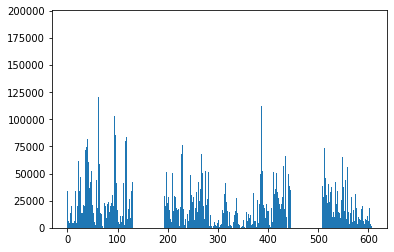

In [ ]:
# p186
import matplotlib.pyplot as plt
plt.bar(range(len(result)), result)
plt.show()

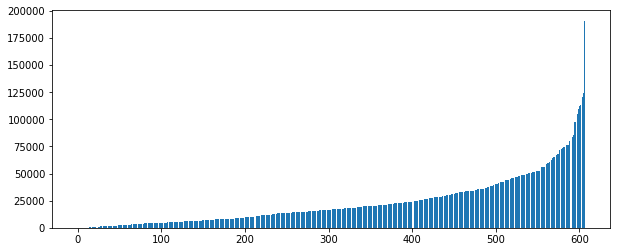

In [ ]:
# p187
result.sort()
plt.figure(figsize=(10,4))
plt.bar(range(len(result)), result)

plt.show()

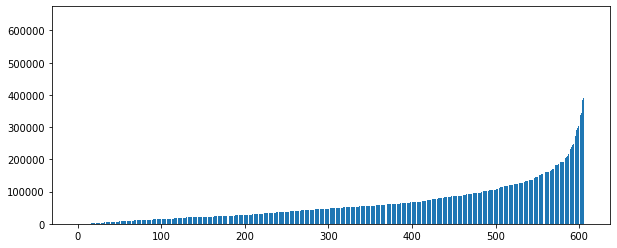

In [ ]:
# p187
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

result = []
for row in data :
  row[4:] = map(int, row[4:])
  result.append(sum(row[10:15:2])) # 10, 12, 14
result.sort()
plt.figure(figsize=(10,4))
plt.bar(range(len(result)), result)
plt.show()

In [ ]:
# p188, 승차 인원 최대값 찾기
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station = ''

for row in data :
  row[4:] = map(int, row[4:])
  if sum(row[10:15:2]) > mx :
      mx = sum(row[10:15:2])
      mx_station = row[3] + ' ' + row[1]
print(mx_station, mx)

신림 2호선 642667


In [ ]:
# p188, 하차 인원 최대값 찾기 - 직장이 많음
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station = ''

for row in data :
  row[4:] = map(int, row[4:])
  a = sum(row[11:16:2])
  if a > mx :
      mx = a
      mx_station = row[3] + ' ' + row[1]
print(mx_station, mx)

강남 2호선 741996


### 03. 밤 11시에 사람들이 가장 많이 타는 역은 어디일까, p190
- 시간대를 입력받아 해당하는 시간의 승차 인원을 계산하여 출력함.
- 색인의 패턴을 찾아서 계산해야 한다.
- i = 4 + (t - 4) * 2

In [ ]:
# p192, 입력 받은 시간의 승차 인원 최대값 찾기
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station = ''

t = int(input('시간을 입력하세요 : '))

for row in data :
  row[4:] = map(int, row[4:])
  a = row[4+(t-4)*2]
  if a > mx :
      mx = a
      mx_station = row[3] + ' ' + row[1]
print(mx_station, mx)

시간을 입력하세요 : 16
강남 2호선 143520


### 04. 시간대별로 사람들이 가장 많이 타고 내리는 역은 어디일까, p193
- 시간대별 최대 승차인원 역과 인원을 그래프로 나타낸다.
- 색인 i = j * 2 + 4

In [ ]:
# p192, 입력 받은 시간의 승차 인원 최대값 찾기
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = [0] * 24
mx_station = [''] * 24

for row in data :
  row[4:] = map(int, row[4:])
  for j in range(24) :
    a = row[j*2+4]
    if a > mx[j] :
      mx[j] = a
      mx_station[j] = str((j+4)%24) + ' ' + row[3]
print(mx_station)
print(mx)

['4 구로', '5 신림', '6 신림', '7 신림', '8 신림', '9 신림', '10 신림', '11 신림', '12 강남', '13 강남', '14 강남', '15 강남', '16 강남', '17 강남', '18 강남', '19 강남', '20 강남', '21 강남', '22 강남', '23 강남', '0 정자', '1 군자(능동)', '2 역삼', '']
[11281, 40255, 72944, 190957, 287068, 164642, 84947, 69868, 79730, 93583, 101584, 125307, 143520, 222903, 312517, 185908, 137750, 169220, 140482, 17074, 482, 4, 1, 0]


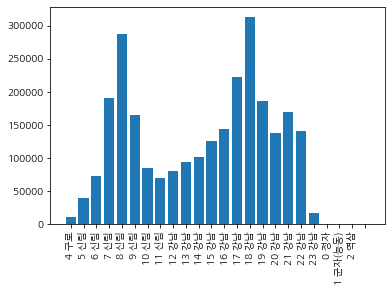

In [ ]:
# p195, 그래프로 표현하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.bar(range(24), mx)
plt.xticks(range(24), mx_station, rotation=90)
plt.show()

['4 영등포', '5 강남', '6 강남', '7 강남', '8 가산디지털단지', '9 강남', '10 강남', '11 강남', '12 강남', '13 강남', '14 강남', '15 강남', '16 잠실(송파구청)', '17 신림', '18 신림', '19 신림', '20 신림', '21 신림', '22 신림', '23 신림', '0 구로', '1 구파발', '2 화계', '']
[71, 10959, 49108, 144595, 374853, 297597, 135352, 101144, 96435, 114250, 98764, 88590, 94838, 132599, 234879, 194732, 114642, 107943, 108569, 47145, 4994, 8, 3, 0]


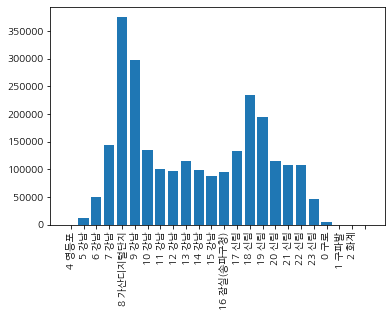

In [ ]:
# p197, 입력 받은 시간의 하차 인원 최대값 찾기
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = [0] * 24
mx_station = [''] * 24

for row in data :
  row[4:] = map(int, row[4:])
  for j in range(24) :
    a = row[j*2+5]
    if a > mx[j] :
      mx[j] = a
      mx_station[j] = str((j+4)%24) + ' ' + row[3]
print(mx_station)
print(mx)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.bar(range(24), mx)
plt.xticks(range(24), mx_station, rotation=90)
plt.show()

### 05. 모든 지하철역에서 시간대별 승하차 인원을 모두 더하면, p198
- 시간대별 승하차 추이

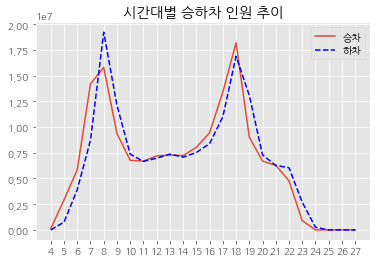

In [ ]:
# p200, 시간대별 승하차 인원 추이
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

s_in = [0] * 24
s_out = [0] * 24

for row in data :
  row[4:] = map(int, row[4:])
  for i in range(24) :
    s_in[i] += row[4+i*2]
    s_out[i] += row[5+i*2]

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.style.use('ggplot')
plt.title('시간대별 승하차 인원 추이')
plt.plot(s_in, label='승차')
plt.plot(s_out, 'b--', label='하차')
plt.legend()
plt.xticks(range(24), range(4,28))
plt.show()